In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Download the data

In [2]:
import opendatasets as od

download_url='https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db'

od.download(download_url)

Skipping, found downloaded files in ".\ultimate-spotify-tracks-db" (use force=True to force download)


In [3]:
data_filename = './ultimate-spotify-tracks-db/SpotifyFeatures.csv'

## load the dataset

In [4]:
df_tracks = pd.read_csv(data_filename)
df_tracks.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Adding a new column, 'release date', so we can do more analysis based on the datetime.

In [5]:
import numpy as np
year = np.random.choice(np.arange(1922, 2024), size=232725, replace=True)
year.sort()
 
    
month = np.random.choice(np.arange(1, 13), size=232725, replace=True)

day = np.random.choice(np.arange(1,29), size=232725, replace=True)



df = pd.DataFrame({'year': year,
                   'month': month,
                    'day': day})
datetime_col = pd.to_datetime(df[['year', 'month', 'day']])
df_tracks.insert(3, "release_date", datetime_col)

In [6]:
#null values checkes

pd.isnull(df_tracks).sum() # sum() method is used to sum up the total null value in each column

genre               0
artist_name         0
track_name          0
release_date        0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [7]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   genre             232725 non-null  object        
 1   artist_name       232725 non-null  object        
 2   track_name        232725 non-null  object        
 3   release_date      232725 non-null  datetime64[ns]
 4   track_id          232725 non-null  object        
 5   popularity        232725 non-null  int64         
 6   acousticness      232725 non-null  float64       
 7   danceability      232725 non-null  float64       
 8   duration_ms       232725 non-null  int64         
 9   energy            232725 non-null  float64       
 10  instrumentalness  232725 non-null  float64       
 11  key               232725 non-null  object        
 12  liveness          232725 non-null  float64       
 13  loudness          232725 non-null  float64       
 14  mode

In [8]:
# which artists has the most number of songs in the spotify
df_tracks['artist_name'].value_counts()

Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane                     1
Claudio Arrau                  1
Charles Daellenbach            1
Jr Thomas & The Volcanos       1
Name: artist_name, Length: 14564, dtype: int64

In [9]:
# 10 least popular songs present in this data set

sorted_df = df_tracks.sort_values('popularity', ascending=True).head(10)
sorted_df

,genre,artist_name,track_name,release_date,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,1922-02-07,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
74954,Children's Music,Sing n Play,"See, See My Playmate",1954-02-01,3WaCwwpGoxLEkFmd6cpZO5,0,0.1390,0.556,150487,0.4390,0.006400,D,0.1720,-11.604,Major,0.0288,165.306,4/4,0.820
74958,Children's Music,Children Songs Company,By the God - Instrumental,1954-04-16,5yDehr9ccZo3vBO8hZXFcK,0,0.2130,0.736,212547,0.4460,0.821000,D,0.2980,-12.328,Major,0.0504,130.011,4/4,0.668
74959,Children's Music,Children Songs Company,Interruption Please - Instrumental,1954-07-28,6NEULw7AmTOAYRunPWcFvn,0,0.0131,0.639,184000,0.8440,0.095700,A#,0.0399,-8.582,Minor,0.0439,120.027,4/4,0.271
74961,Children's Music,Children Songs Company,Breeze,1954-09-05,6v126eNn1A79yFIKGfvqLz,0,0.0280,0.607,147653,0.5540,0.000000,A,0.1690,-10.571,Major,0.3710,92.193,4/4,0.404
74962,Children's Music,Children Songs Company,Woodland,1954-01-22,7qR2PWbDeuhh1Vzd0anb25,0,0.9950,0.529,266067,0.1540,0.414000,B,0.1230,-9.222,Minor,0.0470,69.588,4/4,0.332
74963,Children's Music,Children Songs Company,Cool Me - Instrumental,1954-10-25,0V3Q9RYUaiLKTJIvg4KCST,0,0.2500,0.623,350080,0.4710,0.931000,A#,0.2580,-8.675,Major,0.0332,120.015,4/4,0.515
74964,Children's Music,Sing n Play,The Tortoise and the Hare,1954-08-01,0oX193rf5y87RipsZnH8Pq,0,0.4960,0.563,201362,0.3460,0.000000,D,0.1200,-14.058,Major,0.0938,144.642,4/4,0.370
56153,Movie,Bruno Pelletier,Lié par le sang,1946-06-27,3GO9Wo14FvMXvOKE4LItjg,0,0.0294,0.656,276027,0.6940,0.000017,A,0.0527,-6.755,Major,0.0273,120.085,4/4,0.449
74966,Children's Music,Children Songs Company,Forsaken,1954-11-04,1rRNU87xfqvxiUsEXXyi8k,0,0.9940,0.429,129387,0.0382,0.000000,B,0.4480,-12.704,Major,0.0557,156.807,3/4,0.474


In [10]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [11]:
# 10 most popular songs which are greater than 90

most_popular = df_tracks.query('popularity>90',inplace=False).sort_values('popularity',ascending=False)
most_popular[:10]

,genre,artist_name,track_name,release_date,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,1969-06-01,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9027,Dance,Ariana Grande,7 rings,1925-08-04,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",1925-01-14,4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,1960-08-20,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,1969-04-23,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",1969-11-26,4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
138918,Reggaeton,Daddy Yankee,Con Calma,1982-01-28,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
66643,Hip-Hop,Daddy Yankee,Con Calma,1951-10-04,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,1969-12-16,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,1960-12-28,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913


In [12]:
# convert milisecond column into second

df_tracks['duration']=df_tracks['duration_ms'].apply(lambda x: round(x/1000))
df_tracks.drop('duration_ms', inplace=True, axis=1) #inplace=True is used to replace the old 'duration_ms' column by the new 'duraiton' column


In [13]:
df_tracks.duration.head()

0     99
1    137
2    170
3    152
4     83
Name: duration, dtype: int64

## correlation map

In [14]:
updated_df = df_tracks.drop(['key','mode'],axis=1) #dropping two columns which are unnecessary for finding correlation
corr_df = updated_df.corr(method="pearson") # this is the correlation dataframe
corr_df

C:\Users\Ifthekher Uddin Chy\AppData\Local\Temp\ipykernel_10392\1539997435.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = updated_df.corr(method="pearson") # this is the correlation dataframe


,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
popularity,1.000000,-0.381295,0.256564,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076,0.002347
acousticness,-0.381295,1.000000,-0.364546,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,0.011200
danceability,0.256564,-0.364546,1.000000,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.125781
energy,0.248922,-0.725576,0.325807,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,-0.030545
instrumentalness,-0.210983,0.316154,-0.364941,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,0.076017
liveness,-0.167995,0.069004,-0.041684,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,0.023791
loudness,0.363011,-0.690202,0.438668,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,-0.047614
speechiness,-0.151076,0.150935,0.134560,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.016161
tempo,0.081039,-0.238247,0.021939,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,-0.028447
valence,0.060076,-0.325798,0.547154,0.436771,-0.307522,0.011804,0.399901,0.023842,0.134857,1.000000,-0.141815


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'acousticness'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'duration')]

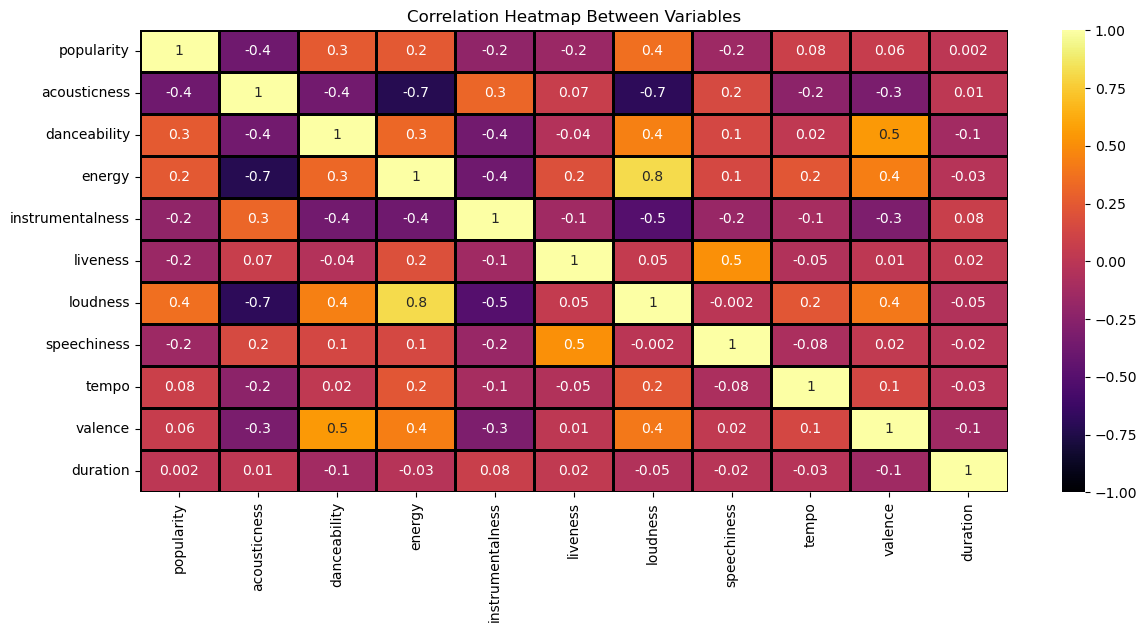

In [15]:
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

From the heatmap, we can check which variables are strogly or moderetly or weakly correlated and if their correlation is positive or negative.

In [16]:
sample_df = df_tracks.sample(int(.004*len(df_tracks))) # createing a sample dataframe from the original dataframe by using the 4% of data.

In [17]:
print(len(sample_df))

930


From the heatmap we see that, Energy and Loudness have a strong correlation of 0.8. Let's create a regression plot of these two variables.

Text(0.5, 1.0, 'Loudness vs Energy Correlation')

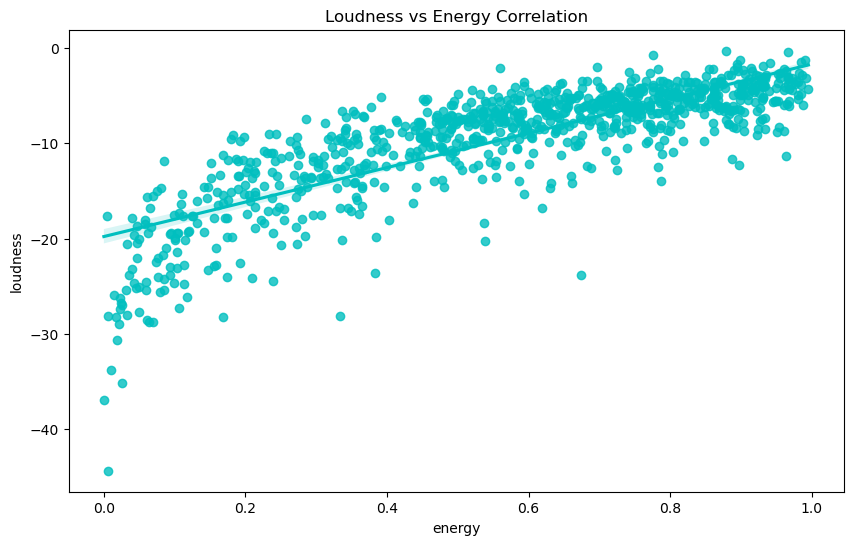

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y="loudness", x="energy", color="c").set_title("Loudness vs Energy Correlation")

Text(0.5, 1.0, 'Popularity vs acousticness Correlation')

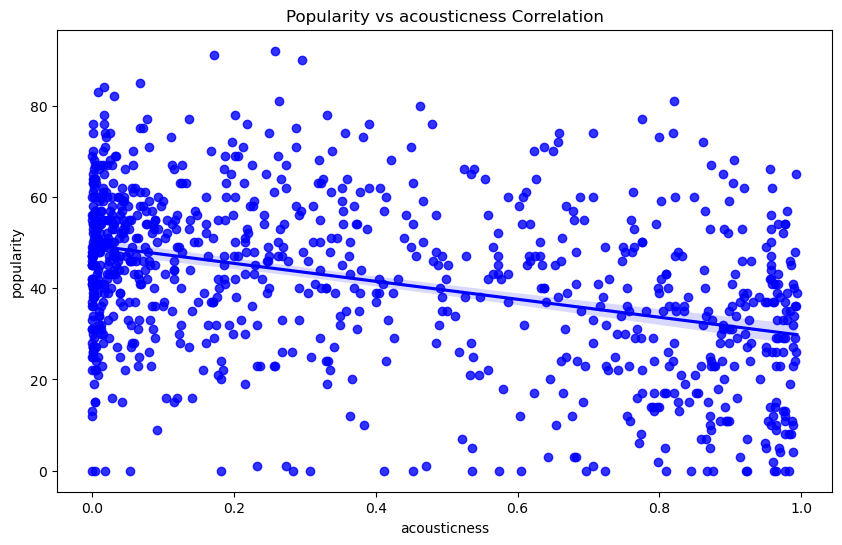

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y="popularity", x="acousticness", color="b").set_title("Popularity vs acousticness Correlation")

In [26]:
years=df_tracks['release_date'].dt.year

we are going to create a distribuiton plot to visualize the total number of songs in each years.

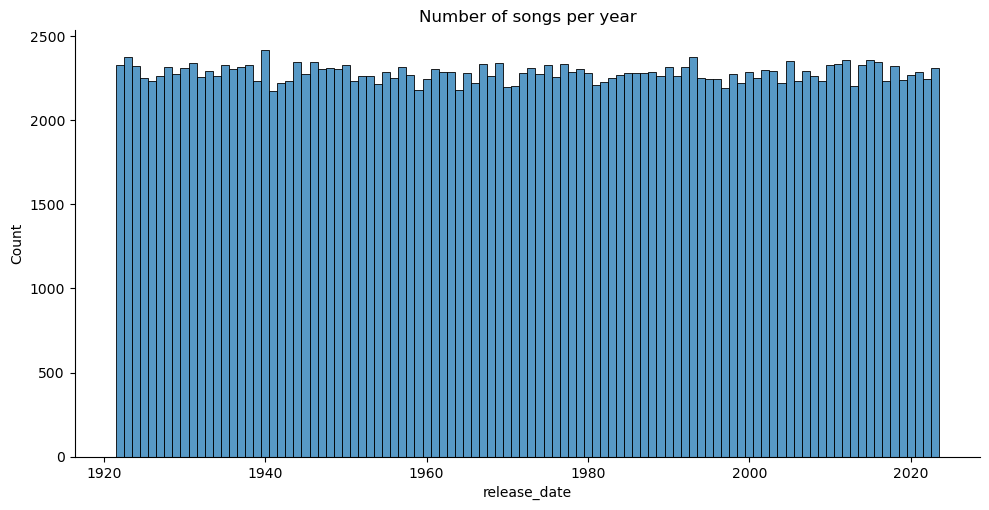

In [27]:
sns.displot(years, discrete=True, aspect=2,height=5,kind='hist').set(title='Number of songs per year')

since we have used random method under NumPy package, so it produces random number uniformly. But if we had the original release date of each songs then we are expected to see a histogram plot where the number of songs release in each year is increasing every year.

Now we will look into the duration of songs over the year.For that, we are going to use bar plot

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 [Text(0, 0, '1922'),
  Text(1, 0, '1923'),
  Text(2, 0, '1924'),
  Text(3, 0, '1925'),
  Text(4, 0, '1926'),
  Text(5, 0, '1927'),
  Text(6, 0, '1928'),
  Text(7, 0, '1929'),
  Text(8, 0, '1930'),
  Text(9, 0, '1931'),
  Text(10, 0, '1932'),
  Text(11, 0, '1933'),
  Text(12, 0, '1934'),
  Text(13, 0, '1935'),
  Text(14, 0, '1936'),
  Text(15, 0, '1937'),
  Text(16, 0, '1938'),
  Text(17, 0, '1939'),
  Text(18, 0, '1940'

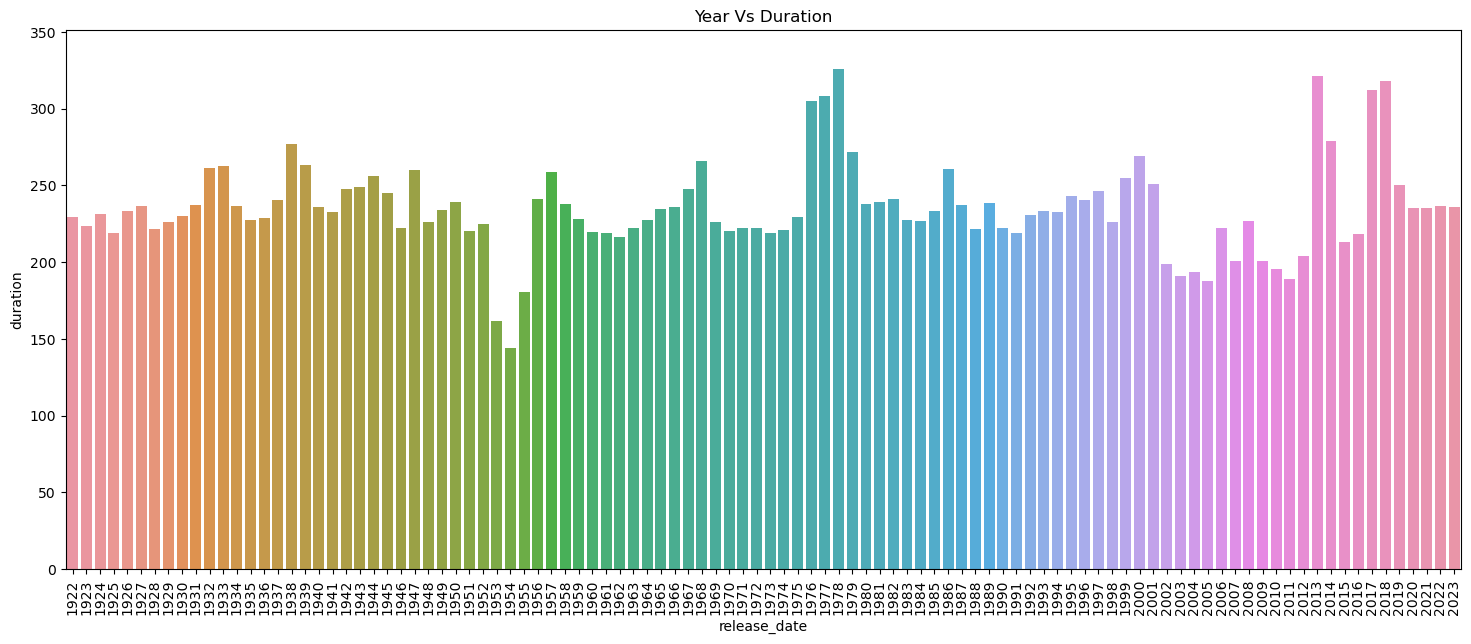

In [29]:
total_dr=df_tracks.duration
fig_dims = (18,7)
fig,ax = plt.subplots(figsize=fig_dims)
fig=sns.barplot(x=years,y=total_dr,ax=ax,errwidth=False).set(title="Year Vs Duration")
plt.xticks(rotation=90)

We are going to create a line plot to analyze the avarage duration of songs over the years.

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

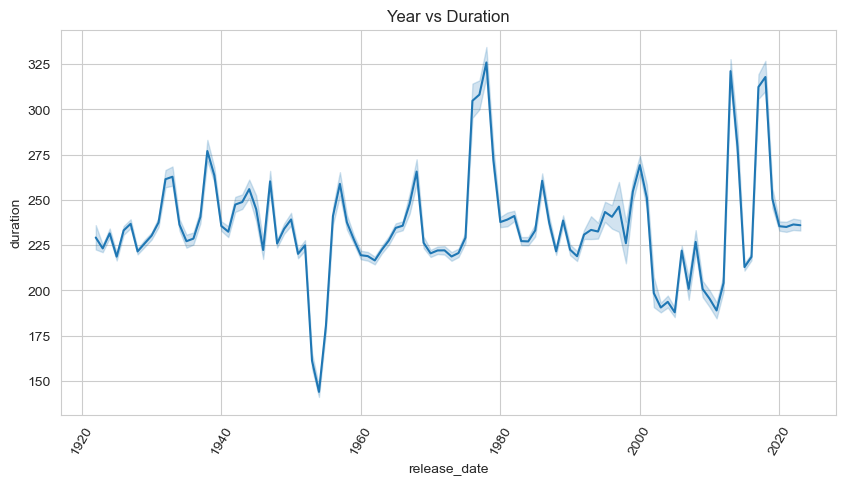

In [31]:
total_df=df_tracks.duration
sns.set_style(style='whitegrid')
fig_dims=(10,5)
fig,ax=plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=years, y=total_df, ax=ax).set(title='Year vs Duration')
plt.xticks(rotation=60)